# 1. Import Libraries and Load Dataset

In [1]:
%%capture
#!git clone https://github.com/huggingface/transformers.git
!pip install datasets evaluate transformers[sentencepiece]
!pip install rouge_score
!pip install underthesea
!pip install pyvi
!pip install gdown

In [2]:
#%%capture

import gdown

!gdown 1jWDnP1xF01_pmeJYsRHxSVBkLZ0I9LAt #utils T5 for VQA
!gdown 1jHGEuwjMI_P81Ha-L3o5IK6hAu6YQAjG #scoring

!gdown 1qnNWZxC5m98e0WWe3imhB8SBEsfdYSMU #train_vicap
!gdown 12LDipW3YviQ3j0FZk0YGVoQ_itH--UOf #dev vicap
!gdown 1dYYjHKxTXRROAJfsNhdQQO6zQUGTHlzf #test vicap

!gdown 1WKJC33RpxTot6YRryVwBuQCRhkehsM2g #train_dev_easyocr
!gdown 1YJnYlwtnPM2Ebf3VDWOkBSEaCUew4IBx #test easyocr

!gdown 16uy9ZMZ1oNW5ypK9bIH36Vjcx3ahD5yn #train_ocr
!gdown 1G2s7WCJPHxPW3X9M98aBLrhpujDDVch7 #dev_ocr
!gdown 1M8lDZNxsoMEg5KEIj3RLwcCtQ_kCKrA9 #test_ocr

!gdown 13-1gZ9fKczPDtMLUyqycWdETuVTHXT-T #train_dev_ofa
!gdown 1KjcrCACc7ybD4vxCFXtAzlDnnxteftJy #test_ofa

!gdown 1nE8SW5nueb11K8iFqLOzjV3vRDqCZCIQ #train obj
!gdown 1xrtegbV1J3vVyTQ86fLfns58zBqvt3eT #dev obj
!gdown 1V7ySccZBPTeGiCHJXWeMe1u_xS-Dz3ob #test obj

!gdown 1Ix-KRgorPmaykBBXBAvo1l97aA5tAfdH #train vilt
!gdown 1vvcLLju3k8YR5HhZ2rlPlefDTjRq0b44 #dev vilt
!gdown 1ZL9gDDqV4AsNIrXu-U2dGotefTm_MLgW #test vilt

!unzip -o scoring_program.zip

Downloading...
From (uriginal): https://drive.google.com/uc?id=1jWDnP1xF01_pmeJYsRHxSVBkLZ0I9LAt
From (redirected): https://drive.google.com/uc?id=1jWDnP1xF01_pmeJYsRHxSVBkLZ0I9LAt&confirm=t&uuid=71999ca8-adcc-40ec-a192-a2261d7810e3
To: /kaggle/working/utils.py
100%|█████████████████████████████████████████| 109k/109k [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jHGEuwjMI_P81Ha-L3o5IK6hAu6YQAjG
To: /kaggle/working/scoring_program.zip
100%|██████████████████████████████████████| 10.5k/10.5k [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qnNWZxC5m98e0WWe3imhB8SBEsfdYSMU
To: /kaggle/working/train_vicap.json
100%|███████████████████████████████████████| 6.66M/6.66M [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=12LDipW3YviQ3j0FZk0YGVoQ_itH--UOf
To: /kaggle/working/dev_vicap.json
100%|█████████████████████████████████████████| 790k/790k [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.co

In [3]:
import json
train_json = json.load(open('/kaggle/input/vlsp2023-dsvivrc/training-data/training-data/vlsp2023_train_data.json'))
dev_json = json.load(open('/kaggle/input/vlsp2023-dsvivrc/dev-set/dev-set/vlsp2023_dev_data.json'))
test_json = json.load(open('/kaggle/input/vlsp2023-dsvivrc/test-set/test-set/vlsp2023_test_data.json'))

easyocr_json = json.load(open('/kaggle/working/easyocr.json'))
test_easyocr_json = json.load(open('/kaggle/working/test_easyocr.json'))

train_vicap = json.load(open('/kaggle/working/train_vicap.json'))
dev_vicap = json.load(open('/kaggle/working/dev_vicap.json'))
test_vicap = json.load(open('/kaggle/working/test_vicap.json'))

train_ocr = json.load(open('/kaggle/working/train_ocr.json'))
dev_ocr = json.load(open('/kaggle/working/dev_ocr.json'))
test_ocr = json.load(open('/kaggle/working/test_ocr.json'))

ofa_vqa_json = json.load(open('/kaggle/working/ofa_vqa_vi.json'))
test_ofa_vqa_json = json.load(open('/kaggle/working/test_ofa_vqa_vi.json'))

train_obj = json.load(open('/kaggle/working/train_obj.json'))
dev_obj = json.load(open('/kaggle/working/dev_obj.json'))
test_obj = json.load(open('/kaggle/working/test_obj.json'))

#ViLT@10
#train_vilt = json.load(open('/kaggle/working/train_vilt_vnese.json'))
#train_vilt = {k:'. '+ ", ".join(v['answers'])+'. ' for k, v in train_vilt.items()}
#dev_vilt = json.load(open('/kaggle/working/dev_vilt_vnese.json'))
#dev_vilt = {k:'. '+ ", ".join(v['answers'])+'. ' for k, v in dev_vilt.items()}
#test_vilt = json.load(open('/kaggle/working/test_vilt_vnese.json'))
#test_vilt = {k:'. '+ ", ".join(v['answers'])+'. ' for k, v in test_vilt.items()}

# #ViLT@5
# train_vilt = json.load(open('/kaggle/working/train_vilt_vnese.json'))
# train_vilt = {k:'. '+ ", ".join(v['answers'][:1])+'. ' for k, v in train_vilt.items()}
# dev_vilt = json.load(open('/kaggle/working/dev_vilt_vnese.json'))
# dev_vilt = {k:'. '+ ", ".join(v['answers'][:1])+'. ' for k, v in dev_vilt.items()}
# test_vilt = json.load(open('/kaggle/working/test_vilt_vnese.json'))
# test_vilt = {k:'. '+ ", ".join(v['answers'][:1])+'. ' for k, v in test_vilt.items()}



In [4]:
#%%capture
%cd /kaggle/working
import os
import shutil

source_all = ['/kaggle/input/vlsp2023-dsvivrc/training-data/training-data/training-images/training-images',
              '/kaggle/input/vlsp2023-dsvivrc/dev-set/dev-set/dev-images/dev-images',
              '/kaggle/input/vlsp2023-dsvivrc/test-set/test-set/test-images/test-images']
destination = './images'
os.mkdir(destination)

for source in source_all:
    allfiles = os.listdir(source)
    for f in allfiles:
        src_path = os.path.join(source, f)
        dst_path = os.path.join(destination, f)
        shutil.copy(src_path, dst_path)

/kaggle/working


In [5]:
import pandas as pd

train_set = pd.DataFrame(train_json['annotations']).T
dev_set = pd.DataFrame(dev_json['annotations']).T
test_set = pd.DataFrame(test_json['annotations']).T

train_set = train_set[['question','answer','image_id']]
train_set['image_id'] = train_set['image_id'].astype(str)

dev_set = dev_set[['question','answer','image_id']]
dev_set['image_id'] = dev_set['image_id'].astype(str)

test_set = test_set[['question','answer','image_id']]
test_set['image_id'] = test_set['image_id'].astype(str)


#add feature enrichment
#train_set['question'] = train_set['question'].str.replace(' ?','') + " " + train_set.index.map(lambda x: train_vilt[x]) + " " +train_set.index.map(lambda x: ofa_vqa_json[x])  + " " + train_set['image_id'].apply(lambda x: train_obj[x]+ ' ' + train_ocr[x] + ' ' + easyocr_json[x] + ' ' + train_vicap[x]) #
#dev_set['question'] = dev_set['question'].str.replace(' ?','') + " " + dev_set.index.map(lambda x: dev_vilt[x])  + " " + dev_set.index.map(lambda x: ofa_vqa_json[x]) + " " + dev_set['image_id'].apply(lambda x: dev_obj[x]+ ' ' +  dev_ocr[x] + ' ' + easyocr_json[x] + ' ' + dev_vicap[x])
#test_set['question'] = test_set['question'].str.replace(' ?','') + " " + test_set.index.map(lambda x: test_vilt[x]) + " " + test_set.index.map(lambda x: test_ofa_vqa_json[x]) + " " + test_set['image_id'].apply(lambda x: test_obj[x]+ ' ' +  test_ocr[x] + ' ' + test_easyocr_json[x] + ' ' + test_vicap[x]) #no ofa yet

#Only OFA
train_set['question'] = train_set['question'].str.replace(' ?','') + " " + train_set.index.map(lambda x: ofa_vqa_json[x])
dev_set['question'] = dev_set['question'].str.replace(' ?','') + " " + dev_set.index.map(lambda x: ofa_vqa_json[x])
test_set['question'] = test_set['question'].str.replace(' ?','') + " " + test_set.index.map(lambda x: test_ofa_vqa_json[x])

# #Only ViLT@5
# train_set['question'] = train_set['question'].str.replace(' ?','') + " " + train_set.index.map(lambda x: train_vilt[x])
# dev_set['question'] = dev_set['question'].str.replace(' ?','') + " " + dev_set.index.map(lambda x: dev_vilt[x])
# test_set['question'] = test_set['question'].str.replace(' ?','') + " " + test_set.index.map(lambda x: test_vilt[x])

# #Only Image description
# train_set['question'] = train_set['question'].str.replace(' ?','') + " " + train_set['image_id'].apply(lambda x: train_obj[x]) #
# dev_set['question'] = dev_set['question'].str.replace(' ?','') + " " + dev_set['image_id'].apply(lambda x: dev_obj[x])
# test_set['question'] = test_set['question'].str.replace(' ?','') + " " + test_set['image_id'].apply(lambda x: test_obj[x])


#add only ez_ocr
#train_set['question'] = train_set['question'].str.replace(' ?','') + " " + train_set['image_id'].apply(lambda x: train_ocr[x]) #
#dev_set['question'] = dev_set['question'].str.replace(' ?','') + " " + dev_set['image_id'].apply(lambda x: dev_ocr[x]) #test_set['question'] = test_set['question'].str.replace(' ?','') + " " + test_set.index.map(lambda x: test_vilt[x]) + " " + test_set.index.map(lambda x: test_ofa_vqa_json[x]) + " " + test_set['image_id'].apply(lambda x: test_obj[x]+ ' ' +  test_ocr[x] + ' ' + test_easyocr_json[x] + ' ' + test_vicap[x]) #no ofa yet
#test_set['question'] = test_set['question'].str.replace(' ?','') + " " + test_set['image_id'].apply(lambda x: test_ocr[x]) #

typos = {'Dấu hiệu':'Bảng hiệu',
        'dấu hiệu':'bảng hiệu',
        'mặt nạ':'khẩu trang'}

train_set['question'] = train_set['question'].replace(typos, regex=True)
dev_set['question'] = dev_set['question'].replace(typos, regex=True)
test_set['question'] = test_set['question'].replace(typos, regex=True)

train_set['question'] = train_set['question'].str.lower()
dev_set['question'] = dev_set['question'].str.lower()
test_set['question'] = test_set['question'].str.lower()

img_dict_train = train_json['images']
img_dict_dev = dev_json['images']
img_dict_test = test_json['images']
img_dict = dict(img_dict_train)
img_dict.update(img_dict_dev)
img_dict.update(img_dict_test)

print(len(img_dict_train))
print(len(img_dict_dev))
print(len(img_dict_test))
print(len(img_dict))

9129
1070
1000
11199


<Axes: >

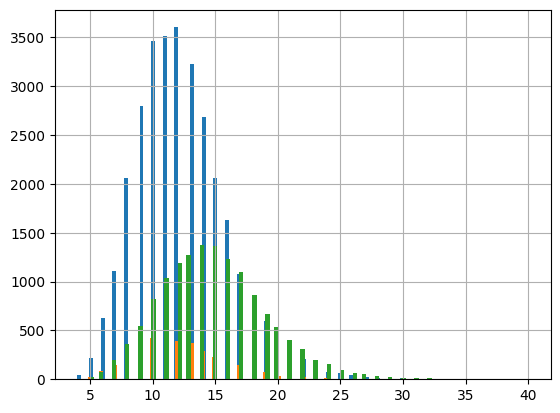

In [6]:
train_set['question'].str.split().str.len().hist(bins=100)
dev_set['question'].str.split().str.len().hist(bins=100)
test_set['question'].str.split().str.len().hist(bins=100)

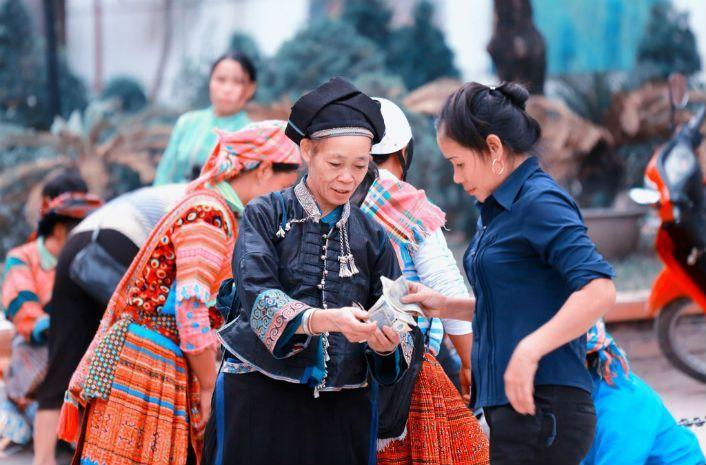

Sample id: 37778
Image id:  3689
Question: đứng bên cạnh người đàn bà đang đếm tiền là ai đó là một người phụ nữ
Groundtruth: đứng bên cạnh người đàn bà đang đếm tiền là người phụ nữ mặc áo màu xanh dương


In [7]:
from PIL import Image
from IPython.display import Image, display
import random

def show_example(a_set):
    a_sample = a_set.sample(1)
    
    q = a_sample['question'].values[0]
    gt = a_sample['answer'].values[0]
    img = a_sample['image_id'].values[0]
    
    img_p = '/kaggle/working/images/' + img_dict[str(img)]
    display(Image(img_p, width=300))
    print('Sample id:',a_sample.index[0])
    print('Image id: ',img)
    print('Question:',q)
    print('Groundtruth:',gt)

show_example(dev_set)

# 2. Image Features Extraction

### ViT-B/16 (load từ HuggingFace)

In [8]:
# from PIL import Image
# import tqdm
# from transformers import (
#     AutoTokenizer, AutoFeatureExtractor,
#     AutoModel,            
#     TrainingArguments,
#     logging
# )
# import torch
# from torch.nn.functional import normalize
# from IPython.display import FileLink

# model_name = 'google/vit-base-patch16-224-in21k'
# #model_name = 'microsoft/beit-base-patch16-224-pt22k-ft22k'

# image_encoder = AutoModel.from_pretrained(model_name)
# preprocessor = AutoFeatureExtractor.from_pretrained(model_name)

# img_w = {}
# for k,v in tqdm.tqdm_notebook(img_dict.items()):
#     imgl = '/kaggle/working/images/' + v
#     processed_images = preprocessor(images=[Image.open(imgl).convert('RGB')],
#                                     return_tensors="pt",)['pixel_values']
#     with torch.no_grad():
#         encoded_image = image_encoder(pixel_values=processed_images, return_dict=True).last_hidden_state[:,1:,:].squeeze()# we discard the CLS token
#         #encoded_image = encoded_image.last_hidden_state[:,1:,:].squeeze() 
#     img_w[k] = normalize(encoded_image, p=10, dim = 1) #.to('cpu')
#     #img_w[k] = encoded_image
#     del encoded_image
#     torch.cuda.empty_cache()
# torch.save(img_w, '/kaggle/working/vit-b.pt') # export for later used
# FileLink(r'vit-b.pt')

# # imgl = '/kaggle/working/images/' + img_dict[int(train_set.image_id[45])]
# # processed_images = preprocessor(images=[Image.open(imgl).convert('RGB')],
# #                                 return_tensors="pt",)['pixel_values']
# # encoded_image = image_encoder(pixel_values=processed_images,
# #                               return_dict=True)

# # last_hidden_state = encoded_image.last_hidden_state[:,1:,:] # we discard the CLS token
# # last_hidden_state.squeeze().size()

### BEiT-2 (load từ timm)

In [9]:
# from urllib.request import urlopen
# from PIL import Image
# import timm
# import tqdm
# import torch
# from IPython.display import FileLink

# model = timm.create_model(
#     'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
#     pretrained=True,
#     num_classes=0,  # remove classifier nn.Linear
# )

# model = model.eval()
# data_config = timm.data.resolve_model_data_config(model)
# transforms = timm.data.create_transform(**data_config, is_training=False)

# img_w = {}

# def batch(iterable, n=1):
#     l = len(iterable)
#     for ndx in range(0, l, n):
#         yield iterable[ndx:min(ndx + n, l)]

# img_w = {}

# #SET_ = 'test'

# p = '/kaggle/working/images/'
# img_dict0 = img_dict

# # if SET_ == 'test':
# #     p = '/kaggle/input/vlsp2023-dsvivrc/test-set/test-set/test-images/test-images/'
# #     img_dict0 = img_dict_test

# for x in tqdm.tqdm_notebook(batch(list(img_dict0.keys()), 3),total=int(len(img_dict0)/3)):
#     img = [Image.open(p + img_dict0[v]).convert('RGB') for v in x]
#     with torch.no_grad():
#         img  = torch.stack([transforms(i) for i in img])
#         output = model.forward_features(img)[:,1:,:]
#     #output = model.forward_features(transforms(img).unsqueeze(0))[0,1:,0]
#     tmp_img_w = {k:v for k,v in zip(x,output)}
#     img_w.update(tmp_img_w)

#     del output
#     del tmp_img_w
#     torch.cuda.empty_cache()

# torch.save(img_w, '/kaggle/working/beitv2-b-p.pt') # export for later used

# FileLink(r'beitv2-b.pt')

In [10]:
import torch
from torch.nn.functional import normalize

#img_w = torch.load('/kaggle/input/vlsp2023-vivrc-vitb/vit-b.pt') # already-saved features
#img_w = torch.load('/kaggle/input/vlsp2023-vivrc-beitv2b/beitv2-b.pt') # already-saved features
img_w = torch.load('/kaggle/input/vlsp-deit-b-d-p16-224/deit_b_d_p16_224.pt') # already-saved features
len(img_w)

11199

# 3. BEiT-ViT5 Modeling

In [11]:
from transformers import T5Tokenizer
from utils import T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("VietAI/vit5-base")
model = T5ForConditionalGeneration.from_pretrained("VietAI/vit5-base").to('cuda')
model.add_imgw(img_w)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Some weights of T5ForConditionalGeneration were not initialized from the model checkpoint at VietAI/vit5-base and are newly initialized: ['resize_img_dim.bias', 'resize_img_dim.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 4. Model Training

### Prepare Data

In [12]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, TrainingArguments, Seq2SeqTrainingArguments
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader

def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["inputs"], max_length=400, truncation=True, padding=True
    )
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["labels"], max_length=50, truncation=True, padding=True
        )
    model_inputs['labels'] = labels['input_ids']
    model_inputs['input_ids'] = model_inputs['input_ids']
    model_inputs["image_id"] = examples["image_id"]
    
    return model_inputs

In [13]:
dict_obj = {}
dict_obj['inputs'] = train_set['question']
dict_obj['labels'] =  train_set['answer']
dict_obj['image_id'] = train_set['image_id']
train_dataset = Dataset.from_dict(dict_obj)
tokenized_train_datasets = train_dataset.map(preprocess_function, batched=True, remove_columns=['inputs'], num_proc=8)

dict_obj = {}
dict_obj['inputs'] = dev_set['question']
dict_obj['labels'] = dev_set['answer']
dict_obj['image_id'] = dev_set['image_id']
dev_dataset = Dataset.from_dict(dict_obj)
tokenized_dev_datasets = dev_dataset.map(preprocess_function, batched=True, remove_columns=['inputs'], num_proc=8)

dict_obj = {}
dict_obj['inputs'] = test_set['question']
dict_obj['labels'] = test_set['answer']
dict_obj['image_id'] = test_set['image_id']
test_dataset = Dataset.from_dict(dict_obj)
tokenized_test_datasets = test_dataset.map(preprocess_function, batched=True, remove_columns=['inputs'], num_proc=8)

#0:   0%|          | 0/4 [00:00<?, ?ba/s]

#1:   0%|          | 0/4 [00:00<?, ?ba/s]

#2:   0%|          | 0/4 [00:00<?, ?ba/s]

#3:   0%|          | 0/4 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


#4:   0%|          | 0/4 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


#5:   0%|          | 0/4 [00:00<?, ?ba/s]

#6:   0%|          | 0/4 [00:00<?, ?ba/s]

#7:   0%|          | 0/4 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


#5:   0%|          | 0/1 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#6:   0%|          | 0/1 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


#7:   0%|          | 0/1 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

#0:   0%|          | 0/2 [00:00<?, ?ba/s]

#1:   0%|          | 0/2 [00:00<?, ?ba/s]

#2:   0%|          | 0/2 [00:00<?, ?ba/s]

#3:   0%|          | 0/2 [00:00<?, ?ba/s]

#4:   0%|          | 0/2 [00:00<?, ?ba/s]

#5:   0%|          | 0/2 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


#6:   0%|          | 0/2 [00:00<?, ?ba/s]

#7:   0%|          | 0/2 [00:00<?, ?ba/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

### Training Configuration

In [14]:
import os
from transformers.optimization import Adafactor, AdafactorSchedule
from utils import DataCollatorForSeq2Seq

os.environ["WANDB_DISABLED"] = "True"

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="pt")

#Adam
training_args = Seq2SeqTrainingArguments(output_dir="./checkpoint",
                                      do_train=True,
                                      do_eval=True,
                                      num_train_epochs=3,
                                      learning_rate=2.5e-5,
                                      warmup_ratio=0.05,
                                      weight_decay=0.01,
                                      per_device_train_batch_size=16,
                                      per_device_eval_batch_size=16,
                                      logging_dir='./log',
                                      group_by_length=True,
                                      save_strategy="steps",
                                      save_total_limit=5,
                                      eval_steps=100,
                                      logging_steps = 100,
                                      evaluation_strategy="steps",
                                      save_steps=100,
                                      load_best_model_at_end= True,
                                      fp16=True,
                                      seed=42,
                                      )

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [15]:
trainer = Seq2SeqTrainer(
    model = model,
    args = training_args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_dev_datasets,
    data_collator=data_collator,
)

trainer.train()

Step,Training Loss,Validation Loss
100,17.102100,1.808930
200,1.179400,0.773481
300,0.605300,0.626039
400,0.507000,0.589109
500,0.475500,0.562252
600,0.472800,0.549823
700,0.445000,0.538753
800,0.444900,0.530299
900,0.435300,0.526383
1000,0.425700,0.515782


TrainOutput(global_step=5784, training_loss=0.6692962112268471, metrics={'train_runtime': 2910.5185, 'train_samples_per_second': 31.781, 'train_steps_per_second': 1.987, 'total_flos': 4107695576140800.0, 'train_loss': 0.6692962112268471, 'epoch': 3.0})

In [16]:
import matplotlib.pyplot as plt
import json

# save loss
log_history = {'log_history':trainer.state.log_history}

with open('13_logs.json', 'w', encoding='utf-8') as f:
    json.dump(log_history, f, ensure_ascii=False, indent=4)

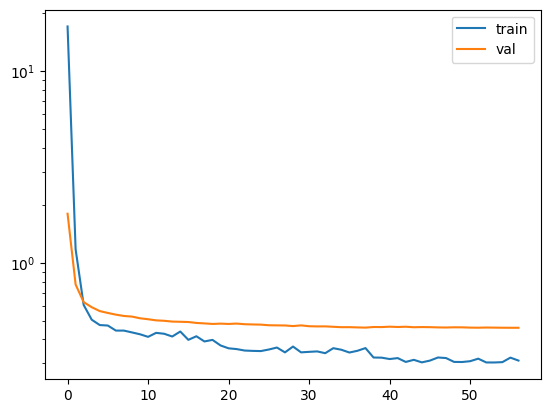

In [17]:
from matplotlib import pyplot

train_loss = {i['step']:i['loss'] for i in log_history['log_history'] if 'loss' in i.keys()}
eval_loss = {i['step']:i['eval_loss'] for i in log_history['log_history'] if 'eval_loss' in i.keys()}
plt.plot(list(train_loss.values()))
plt.plot(list(eval_loss.values()))

plt.yscale('log')
plt.legend(['train','val'])

# 5. Load Checkpoint & Predict

In [18]:
# #save checkpoint 7800 - dev:3.5015
# !zip -r checkpoint_7800.zip /kaggle/working/checkpoint/checkpoint-7800
# from IPython.display import FileLink
# FileLink(r'checkpoint_7800.zip')

In [19]:
# #checkpoint-7800
# !gdown 1FDhXe1S-vd5ePdeHze1ZhuRC-HB_koph
# !unzip /kaggle/working/checkpoint_7800.zip

# !mkdir /kaggle/working/checkpoint/
# !mv /kaggle/working/kaggle/working/checkpoint/checkpoint-7800 /kaggle/working/checkpoint/

In [20]:
os.listdir('/kaggle/working/checkpoint')

['checkpoint-5500',
 'checkpoint-5600',
 'checkpoint-5300',
 'checkpoint-5700',
 'checkpoint-5400']

In [21]:
torch.cuda.empty_cache()
model = T5ForConditionalGeneration.from_pretrained("/kaggle/working/checkpoint/checkpoint-5600")
model.to('cuda')
model.add_imgw(img_w)

lấy kết quả dev và test
* dev: tokenized_dev_datasets
* test: tokenized_test_datasets

In [22]:
#test executing time: 2888s ~ 48m
import torch 
import numpy as np
from datasets import load_metric
metrics = load_metric('rouge')

torch.cuda.empty_cache()
max_target_length = 30
dataloader = torch.utils.data.DataLoader(tokenized_dev_datasets, collate_fn=data_collator, batch_size=8) #replace tokenized_dev_datasets with tokenized_test_datasets

predictions = []
references = []

for i, batch in enumerate(tqdm(dataloader)):

    # greedy search
#     outputs = model.generate(image_id = batch['image_id'],
#         input_ids=batch['input_ids'].to('cuda'),
#         max_length=max_target_length,
#         attention_mask=batch['attention_mask'].to('cuda'),
#         return_dict_in_generate=True, output_attentions=True,)

    #beam search for now   
    outputs = model.generate(image_id = np.repeat(batch['image_id'],7),
        input_ids=batch['input_ids'].to('cuda'),
        max_length=max_target_length,
        attention_mask=batch['attention_mask'].to('cuda'),
        return_dict_in_generate=True, output_attentions=True,
        num_beams=7,
        no_repeat_ngram_size=2)
    
    with tokenizer.as_target_tokenizer():
        outputs = [tokenizer.decode(out, clean_up_tokenization_spaces=False, skip_special_tokens=True) for out in outputs.sequences]
        labels = np.where(batch['labels'] != -100,  batch['labels'], tokenizer.pad_token_id)
        actuals = [tokenizer.decode(out, clean_up_tokenization_spaces=False, skip_special_tokens=True) for out in labels]
    
    predictions.extend(outputs)
    references.extend(actuals)
    metrics.add_batch(predictions=outputs, references=actuals)

metrics.compute()

  0%|          | 0/444 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3660: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'rouge1': AggregateScore(low=Score(precision=0.5339450664605054, recall=0.6545459575233189, fmeasure=0.5518516066466097), mid=Score(precision=0.543702608133879, recall=0.6635975364365312, fmeasure=0.5605426272663354), high=Score(precision=0.5543195648966855, recall=0.6719816532612163, fmeasure=0.5696459703914185)),
 'rouge2': AggregateScore(low=Score(precision=0.4103150380437857, recall=0.4845169934638997, fmeasure=0.41587758635799504), mid=Score(precision=0.4213359512870739, recall=0.4948424439153739, fmeasure=0.4263738969296479), high=Score(precision=0.43227898038283447, recall=0.5055203492514434, fmeasure=0.43678982314512893)),
 'rougeL': AggregateScore(low=Score(precision=0.5065074773477899, recall=0.616605984569583, fmeasure=0.5216934892767748), mid=Score(precision=0.517481182969656, recall=0.6259567158616366, fmeasure=0.5318820718386168), high=Score(precision=0.5274424310855989, recall=0.6356738569890815, fmeasure=0.5407791341220866)),
 'rougeLsum': AggregateScore(low=Score(prec

In [23]:
[{k: v.mid.fmeasure} for k,v in metrics.compute(predictions=predictions, references=references).items()]

[{'rouge1': 0.5605426272663354},
 {'rouge2': 0.4263738969296479},
 {'rougeL': 0.5318820718386168},
 {'rougeLsum': 0.5319294125627888}]

# 7. Evaluation

In [24]:
from evaluation.bleu import Bleu
from evaluation.cider import Cider

import numpy as np
import json
import unicodedata
import re

def preprocess_sentence(sentence: str):
    sentence = sentence.lower()
    sentence = re.sub(r"[“”]", "\"", sentence)
    sentence = re.sub(r"!", " ! ", sentence)
    sentence = re.sub(r"\?", " ? ", sentence)
    sentence = re.sub(r":", " : ", sentence)
    sentence = re.sub(r";", " ; ", sentence)
    sentence = re.sub(r",", " , ", sentence)
    sentence = re.sub(r"\"", " \" ", sentence)
    sentence = re.sub(r"'", " ' ", sentence)
    sentence = re.sub(r"\(", " ( ", sentence)
    sentence = re.sub(r"\[", " [ ", sentence)
    sentence = re.sub(r"\)", " ) ", sentence)
    sentence = re.sub(r"\]", " ] ", sentence)
    sentence = re.sub(r"/", " / ", sentence)
    sentence = re.sub(r"\.", " . ", sentence)
    sentence = re.sub(r"\.\s\.\s\.\s", " ... ", sentence)
    sentence = re.sub(r"-", " - ", sentence)
    sentence = re.sub(r"\$", " $ ", sentence)
    sentence = re.sub(r"\&", " & ", sentence)
    sentence = re.sub(r"\*", " * ", sentence)
    
    return sentence

def compute_scores(gts, gens):
    bleu = Bleu()
    cider = Cider()
    bleu_scores, _ = bleu.compute_score(gts, gens)
    avg_bleu_score = np.array(bleu_scores).mean()
    cider_score, _ = cider.compute_score(gts, gens)

    return {
        "BLEU-1": np.array(bleu_scores)[0],
        "BLEU-2": np.array(bleu_scores)[1],
        "BLEU-3": np.array(bleu_scores)[2],
        "BLEU-4": np.array(bleu_scores)[3],
        "BLEU": avg_bleu_score, 
        "CIDEr": cider_score
    }

def evaluate(truth_file: str, submission_file, code_phase) -> dict:
    gts = json.load(open(truth_file))
    gts = {id: [unicodedata.normalize("NFKD", preprocess_sentence(answer))] for id, answer in gts.items()}

    gens = json.load(open(submission_file))
    gens = {id: [unicodedata.normalize("NFKD", preprocess_sentence(answer))] for id, answer in gens.items()}

    if code_phase == "public_test":
        return compute_scores(gts, gens)
    else:
        gens = {id: answer for id, answer in gens.items() if id in gts}
        return compute_scores(gts, gens)

In [25]:
import re
import pandas as pd
import json
from underthesea import word_tokenize
from underthesea import text_normalize
from pyvi import ViUtils

def postprocessing(t):
    t = t.lower()
    t = t.replace('\\','')
    return t

test_groundtruth = {k:i['labels'] for k,i in zip(dev_json['annotations'].keys(),dev_dataset)}
test_predicted = {k:postprocessing(i) for k,i in zip(dev_json['annotations'].keys(),predictions)}

with open('13_submission_dev.json', 'w') as fp:
    json.dump(test_predicted, fp,ensure_ascii=True,indent=True)

with open('vls2023_openvivqa_test_answers.json', 'w') as fp:
    json.dump(test_groundtruth , fp,ensure_ascii=True, indent=True)

r = evaluate('/kaggle/working/vls2023_openvivqa_test_answers.json',
         '/kaggle/working/13_submission_dev.json',
         'public_test')
r = {k:[v] for k,v in r.items()}
df_result = pd.DataFrame(data=r)
html = df_result.style.set_table_styles([{'selector': 'th', 'props': [('font-size', '13pt')]}]).set_properties(**{'font-size': '13pt'}).format('{:.4f}')
html

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,BLEU,CIDEr
0,0.4483,0.3936,0.3506,0.3162,0.3772,2.9045


In [26]:
from IPython.display import FileLink

FileLink(r'submission.json')

/kaggle/working/submission.json

In [27]:
1/0

ZeroDivisionError: division by zero

# 8. Result Analysis

### Example

In [ ]:
from PIL import Image
from IPython.display import Image, display
import random

dev_set_pred = test_set.copy().reset_index().drop('index',axis=1)
dev_set_pred['preds'] = test_predicted.values()

def show_example(a_set):
    a_sample = a_set.sample(1)
    
    q = a_sample['question'].values[0]
    gt = a_sample['answer'].values[0]
    img = a_sample['image_id'].values[0]
    p = a_sample['preds'].values[0]
    
    img_p = '/kaggle/working/images/' + img_dict[str(img)]
    display(Image(img_p, width=300))
    print(a_sample.index[0])
    
    print('Image id: ',img)
    print('Question:',q)
    print('Groundtruth:',gt)
    print("Predicted:",p)
    #print('Metrics: ',result[a_sample.index[0]])

show_example(dev_set_pred)

### Image Attention Heatmap

In [ ]:
def predict(img,q):
    
    q1 = tokenizer.encode(q,return_tensors='pt')
    attention_mask = torch.ones_like(q1)
    
    outputs = model.generate(image_id = img,
        input_ids=q1.to('cuda'),
        max_length=50,
        attention_mask=attention_mask.to('cuda'),
        return_dict_in_generate=True, output_attentions=True)

    with tokenizer.as_target_tokenizer():
        outputs1 = [tokenizer.decode(out, clean_up_tokenization_spaces=False, skip_special_tokens=True) for out in outputs.sequences]
    print(outputs1[0])
    out = model(input_ids=q1.cuda(),
                image_id = img,
                attention_mask=attention_mask.to('cuda'),
                decoder_input_ids=outputs.sequences, output_attentions=True, return_dict=True)

    encoder_attentions = out.encoder_attentions
    cross_attentions = out.cross_attentions
    decoder_attentions = out.decoder_attentions
#     print(len(encoder_attentions))
#     print(encoder_attentions[0].size())
#     print(len(cross_attentions))
#     print(cross_attentions[0].size())
#     print(len(decoder_attentions))
#     print(decoder_attentions[0].size())
    return q1,outputs1, cross_attentions

In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
def plot_attn(img,attn):
    a = attn[-1]
    #for a in attn:
    attn_img = a.squeeze().mean(dim=0)[:,:196].mean(dim=0).detach().cpu() #last layer, mean all head, mean all output tokens
    attn_img = torch.reshape(attn_img , (-1,14))
    sns.heatmap(attn_img)
    plt.show()
    tmp = cv2.imread('/kaggle/working/images/'+img_dict[img[0]])
    #tmp = cv2.resize(np.array(tmp), (224,224))
    #print(tmp.shape)
    heatmap = cv2.resize(np.array(attn_img) , (tmp.shape[1],tmp.shape[0]))
    heatmapshow = None
    heatmapshow = cv2.normalize(heatmap, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_INFERNO)
    heatmapshow = cv2.cvtColor(heatmapshow, cv2.COLOR_BGR2RGB) 
    final = cv2.addWeighted(src1=tmp,alpha=0.5,src2=heatmapshow,beta=0.5,gamma=0)
    plt.imshow(final)
    plt.show()
    
# #     [-1,-1,:196].detach().cpu()
# #     print(attn_img.size())
    
#     for i in range(100):
#         plt.figure()
#         try:
#             attn_img = attn[-1][0][-1,i,:196].detach().cpu()
#         except:
#             break
#         attn_img = torch.reshape(attn_img , (-1,14)).cpu()

#         tmp = cv2.imread('/kaggle/working/images/'+img_dict[img[0]])
#         tmp = cv2.resize(np.array(tmp), (224,224))
#         heatmap = cv2.resize(np.array(attn_img) , (224,224))
#         heatmapshow = None
#         heatmapshow = cv2.normalize(heatmap, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#         heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
#         heatmapshow = cv2.cvtColor(heatmapshow, cv2.COLOR_BGR2RGB) 
#         final = cv2.addWeighted(src1=tmp,alpha=0.5,src2=heatmapshow,beta=0.5,gamma=0)

#         plt.imshow(final)

In [ ]:
a_sample

In [ ]:
dev_set.loc['14644']['question']

In [ ]:
from PIL import Image
from IPython.display import display
import numpy as np
a_sample = dev_set.sample(1)
a_sample = dev_set.loc[['26622']]
print(a_sample.index)
q = a_sample['question'].values[0]
a = a_sample['answer'].values[0]
print(q)
print(a)
img = [a_sample['image_id'].values[0]]

#display(Image.open('/kaggle/working/images/'+img_dict[img[0]]))
q,a,attn = predict(img,q)
q = [tokenizer.convert_ids_to_tokens(i) for i in q[0].tolist()]
plot_attn(img,attn)

In [ ]:
a = attn[-1].squeeze().mean(dim=0)
a1 = a[:,:196].cpu().detach().numpy()
plt.hist(a1.flatten(),bins=50)
plt.show()
a1 = a[:,196:].cpu().detach().numpy()
plt.hist(a1.flatten(),bins=50)
plt.show()

### Text Attention Map

In [ ]:
len(attn)[]

In [ ]:
tmp = attn[-1][0,:,1:,196:].mean(dim=0).cpu().detach().numpy()
sns.heatmap(tmp)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
attn[-1][-1][-1,:-1,:196].size()#.size()
for i in range(12):
    sns.heatmap(attn[-1][0][i,:,196:].detach().cpu(),cmap='BuPu')
    plt.show()